In [9]:
import pandas as pd
import nltk
from nltk import sent_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob_de import TextBlobDE as TextBlob


In [10]:
file_path = 'C:/Users/Lesia/Desktop/Raibu test task/Raibu.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    reviews = file.read()

sentences_list = sent_tokenize(reviews)
df = pd.DataFrame({'Sentences': sentences_list})

print(df)

                                             Sentences
0    Alles bestens\nErgebnisse nicht vergleichbar, ...
1    Gerne wieder bin zufrieden\nMir wurde Nattokin...
2    Ich kombiniere es noch mit weiteren Nahrungser...
3    OPC, Curcuma, Weihrauch, Ingwer) Bewegung und ...
4    und habe die Blutverdünnung schrittweise ausge...
..                                                 ...
223  War mir zuerst nicht sicher, ob ich dieses Pro...
224  Aufgrund meiner Erkrankung muss ich Blutverdün...
225                      Von wegen Nebenwirkungen usw.
226  Hiermit sieht es schon etwas besser aus und di...
227  Mein Arzt hat mir nach meiner Covid Erkrankung...

[228 rows x 1 columns]


In [15]:
# sentiment is tuple. the 1st argument stands for sentiment (from -1 to 1, where - 1 is negative)
# the 2nd argumane in tuple stands for subjectiveness (from 0 to 1, where 1 - subjective)

def analyze_sentiment(sentence):
    blob = TextBlob(sentence)
    return blob.sentiment

df['Sentiment'] = df['Sentences'].apply(analyze_sentiment)

# print(df.loc[111])
print (df.head(50))

                                            Sentences  \
0   Alles bestens\nErgebnisse nicht vergleichbar, ...   
1   Gerne wieder bin zufrieden\nMir wurde Nattokin...   
2   Ich kombiniere es noch mit weiteren Nahrungser...   
3   OPC, Curcuma, Weihrauch, Ingwer) Bewegung und ...   
4   und habe die Blutverdünnung schrittweise ausge...   
5                                  Tag, dann jeden 3.   
6   Tag, zunächst nur mit Nattokinase kombiniert, ...   
7   Nun bin ich fast 4 Monate frei von Chemie und ...   
8                       Kein Schulmediziner kann bzw.   
9   wird eine Empfehlung zum Absetzen von Blutverd...   
10  Ich schreibe diese Rezension daher um meine Er...   
11  Das Risiko muss aber jeder für sich selbst abs...   
12  Für Personen ohne diesen Hintergrund aber eine...   
13  Ich wünschte, ich hätte es schon früher genomm...   
14  Das hilft sehr beim Abnahme und Blutdrucksenke...   
15  excell;ent product would order again\nIch habe...   
16  Habe die chemischen Medikam

In [16]:
#  cleaning text from the German stop words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords-de')

words = word_tokenize(reviews)
filtered_words = [word for word in words if word.lower() not in stopwords.words('german')]
filtered_text = ' '.join(filtered_words)
print(filtered_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lesia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lesia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading stopwords-de: Package 'stopwords-de' not
[nltk_data]     found in index


bestens Ergebnisse vergleichbar , Einstellung Nehme Unterstützung ( Entgiftung ) 2 Kapseln Abend ! Gerne zufrieden wurde Nattokinase ganzheitlich arbeitenden Ärztin natürlicher Blutverdünner empfohlen ( genau Dosierung , Kapsel bekommt ) , chemischen Blutverdünnung wegkommen , gemäß Leitlinie medizinischen Gründen nehmen . kombiniere weiteren Nahrungsergänzungsmitteln ( z.B . OPC , Curcuma , Weihrauch , Ingwer ) Bewegung ausreichend Trinken ( ! ! ! ) Blutverdünnung schrittweise ausgeschlichen ( 1 Monat 2 . Tag , 3 . Tag , zunächst Nattokinase kombiniert , Absetzen NEMs dazugenommen ) . fast 4 Monate frei Chemie geht gut . Schulmediziner bzw . Empfehlung Absetzen Blutverdünnern geben Leitlinie vorgibt ( wäre Behandlungsfehler ) leicht getan Entscheidung . schreibe Rezension daher Erfahrungen mitzuteilen Personen , ähnlichen Lage . Risiko abschätzen . Personen Hintergrund glasklare Empfehlung Nattokinase , bessere Prävention Bezug Blutfluss gibt , soweit verstanden , . wünschte , hätte s

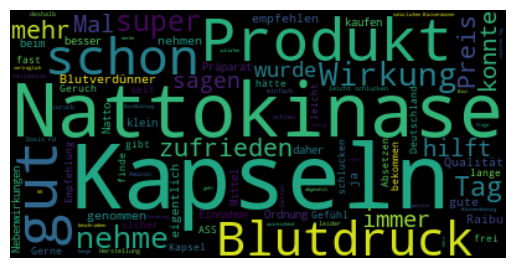

In [17]:
# here weare displaying the word cloud - frequency of words. we use text as one string for that task

cloud = WordCloud().generate(filtered_text)

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()